<a href="https://colab.research.google.com/github/SunhoPark2107/python-restore/blob/main/0628_konlpy_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

from konlpy.tag import Mecab
tokenizer = Mecab()



Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [147]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 81 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 161633 files and di

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [1]:

import konlpy
import pandas as pd
import numpy as np



In [2]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_train.txt', delimiter = '\t', keep_default_na=False)

In [3]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_test.txt', delimiter = '\t', keep_default_na=False)

In [4]:
# MECAB
from konlpy.tag import Mecab
tokenizer = Mecab()

In [5]:
string_test = "아버지가 방에 들어가신다"
tokenizer.morphs(string_test)

['아버지', '가', '방', '에', '들어가', '신다']

In [6]:
def mecab_tokenizer(text):
  return tokenizer.morphs(text)

In [7]:
# TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer(tokenizer=mecab_tokenizer, ngram_range=(1, 2), min_df = 3, max_df = 0.9)

In [9]:
tfidf.fit(df_train['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function mecab_tokenizer at 0x7f622f3fa680>,
                use_idf=True, vocabulary=None)

In [10]:
df_train_tfidf = tfidf.transform(df_train['document'])

In [11]:
# 선형 서포트 벡터 분류기
from sklearn.svm import LinearSVC

svm = LinearSVC()

In [12]:
svm.fit(df_train_tfidf, df_train['label'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [13]:
svm.score(df_train_tfidf, df_train['label'])

0.9693533333333333

In [14]:
# test세트 처리하기
df_test_tfidf = tfidf.transform(df_test['document'])

In [15]:
test_pred = svm.predict(df_test_tfidf)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(df_test['label'], test_pred)

0.86794

In [18]:
s1 = input("얌 말할거잇니:")

얌 말할거잇니:아뉭


In [19]:
import re
s1 = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(s1)
print(s1)

['아뉭']


In [20]:
s1_tfidf = tfidf.transform(s1)
s1_pred = svm.predict(s1_tfidf)

In [21]:
if (s1_pred == 0): print("먼일임 기분 안좋으?")
else: print("좋은일잇냠")

좋은일잇냠


In [22]:
# json 파일 읽어오기.
import json
with open('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news.json') as j_f:
  data = json.load(j_f)

In [23]:
data_title = []
data_description = []
for item in data:
  data_title.append(item['title'])
  data_description.append(item['description'])

In [24]:
data_title[:10]

["결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;",
 '창녕군, ‘창녕형’비대면 선별진료소 운영',
 "DK모바일, 메인 홍보 모델로 AOA '설현' 선정",
 '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]',
 '이재갑 장관, 고용안정지원금 서울센터 방문',
 "'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",
 "31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불",
 '국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’',
 '경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구',
 '이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야&quot;']

In [25]:
len(data_title)

800

In [26]:
data_description[:10]

['<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ',
 '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ',
 "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ",
 '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ',
 '\xa0이재갑\xa0고용노동부\xa0장관은\xa06월3일(수)\xa011시에\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0서울\xa01센터(서울\xa0중구)를\xa0방문했다. 이번\xa0현장\xa0방문은\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0신청을\xa0시작한\xa0지\xa0이틀\xa0만에\xa0약\xa012만건... ',
 "하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로 오프라인 행사를 진행하지 않게 되었고, 공식 채널(Canal +)을 통해 ‘Cannes Official Selection 2020’ 명칭의 초청작 리스트를 공개했다. 한편 '반도'는 7월 국내외... ",
 '경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩 국가보안법

In [27]:
data_df = pd.DataFrame({'title':data_title, 'description':data_description})

In [28]:
data_df[:10]

,title,description
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ..."
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’..."
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...
5,"'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로...
6,"31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불",경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔...
7,국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’,전국 컨테이너 처리량 243만TEU…2.5%↓ 국내 항만은 4월 들어 신종 <b>코...
8,"경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구","한편, '<b>코로나</b>19'로 인한 해외의 식재료 사재기에서 보듯이 국민들의 ..."
9,이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야...,이용빈 의원실 제공 이용빈 민주당 원내부대표가 4일 &quot;<b>코로나</b> ...


In [29]:
data_df['title'] = data_df['title'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df['description'] = data_df['description'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

In [30]:
data_df[:10]

,title,description
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...
5,부산행 반도 로 이어지는 한국형 좀비 세계관 칸의 선택 받았다,하지만 올해 신종 코로나 바이러스 감염증 코로나 여파로 오프라인 행사를 진행하지...
6,년만 첫 불허 에도 홍콩 톈안문 추모 촛불,경찰은 코로나 감염이 우려된다며 명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩...
7,국내 대 항만 월 물동량 인천항만 상승곡선,전국 컨테이너 처리량 만 국내 항만은 월 들어 신종 코로나 바이러스 감염증 ...
8,경기도의회 농정해양위 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구,한편 코로나 로 인한 해외의 식재료 사재기에서 보듯이 국민들의 먹거리를 안정적으...
9,이용빈 원내부대표 코로나 대응 의료진 노동자 건강권 보장해야,이용빈 의원실 제공 이용빈 민주당 원내부대표가 일 코로나 상시화 장기화에 따...


In [31]:
data_title_tfidf = tfidf.transform(data_df['title'])

In [32]:
data_title_pred = svm.predict(data_title_tfidf)

In [33]:
data_df['title_label'] = data_title_pred

In [34]:
data_df

,title,description,title_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,1
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0
...,...,...,...
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 ...,1
796,중부발전 소규모 태양광사업자 판매대금 선 지급,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적...,1
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식...,1
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사...,0


In [35]:
data_description_tfidf = tfidf.transform(data_df['description'])
data_description_pred = svm.predict(data_description_tfidf)

In [36]:
data_df['description_label'] = data_description_pred

In [37]:
data_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news.csv", encoding = 'utf-8')

In [38]:
data_df[:5]

,title,description,title_label,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,1,0
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [39]:
data_df['title_label'].value_counts()

0    478
1    322
Name: title_label, dtype: int64

In [40]:
data_df['description_label'].value_counts()

0    449
1    351
Name: description_label, dtype: int64

In [41]:
columns_name = ['title', 'title_label', 'description', 'description_label']

In [42]:
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns = columns_name)

In [43]:
POS_data_df

,title,title_label,description,description_label


In [44]:
for i, data in data_df.iterrows():
  title = data['title']
  description = data['description']
  title_label = data["title_label"]
  description_label = data["description_label"]
  data = [[title, title_label, description, description_label]]
  if description_label == 0:
    NEG_data_df = NEG_data_df.append(pd.DataFrame(data, columns = columns_name), ignore_index = True)
  else :
    POS_data_df = POS_data_df.append(pd.DataFrame(data, columns = columns_name), ignore_index = True)


NEG_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news_NEG.csv', encoding = "euc-kr")
POS_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news_POS.csv', encoding = "euc-kr")

In [45]:
NEG_data_df[:3]

,title,title_label,description,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,0,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0
1,창녕군 창녕형 비대면 선별진료소 운영,1,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0
2,이재갑 장관 고용안정지원금 서울센터 방문,0,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0


In [46]:
POS_data_df[:3]

,title,title_label,description,description_label
0,모바일 메인 홍보 모델로 설현 선정,1,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1
1,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,1,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1
2,부산행 반도 로 이어지는 한국형 좀비 세계관 칸의 선택 받았다,1,하지만 올해 신종 코로나 바이러스 감염증 코로나 여파로 오프라인 행사를 진행하지...,1


In [47]:
POS_description = POS_data_df['description']
NEG_description = NEG_data_df['description']

In [48]:
POS_description_noun_tk = []
for d in POS_description:
  POS_description_noun_tk.append(tokenizer.nouns(d))   # 여기에서 tokenizer은 mecab이다.위에 올라가 보면 있음.
# POS_description_noun_tk
POS_description_noun_join = []
for d in POS_description_noun_tk :
  d2 = [w for w in d if len(w) > 1]
  POS_description_noun_join.append(" ".join(d2))
# POS_description_noun_join[:5]

In [49]:
NEG_description_noun_tk = []
for d in NEG_description:
  NEG_description_noun_tk.append(tokenizer.nouns(d))   # 여기에서 tokenizer은 mecab이다.위에 올라가 보면 있음.
# NEG_description_noun_tk
NEG_description_noun_join = []
for d in NEG_description_noun_tk :
  d2 = [w for w in d if len(w) > 1]
  NEG_description_noun_join.append(" ".join(d2))
# NEG_description_noun_join[:5]

In [50]:
# p.408~
# 단어들의 가중치 확인.

POS_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, min_df = 2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)
POS_vocab = dict()

In [51]:
for idx, word in enumerate(POS_tfidf.get_feature_names()):
  POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key = lambda x:x[1], reverse = True)


In [52]:
NEG_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, min_df = 2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)
NEG_vocab = dict()

In [53]:
for idx, word in enumerate(NEG_tfidf.get_feature_names()):
  NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key = lambda x:x[1], reverse = True)

In [54]:
POS_words[:5]

[('코로나', 26.93947807550704),
 ('서울', 9.607085771237385),
 ('바이러스', 9.255651895667263),
 ('신종', 8.739115663247095),
 ('감염증', 8.290149332161258)]

In [55]:
NEG_words[:5]

[('코로나', 35.31284742886535),
 ('바이러스', 15.938122092110822),
 ('신종', 14.55057899679154),
 ('감염증', 14.401469506150285),
 ('확산', 10.15370638444467)]

In [58]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 
# 그래프에서 - 가 깨지는 문제 "그룹-1"
matplotlib.rcParams['axes.unicode_minus'] = False

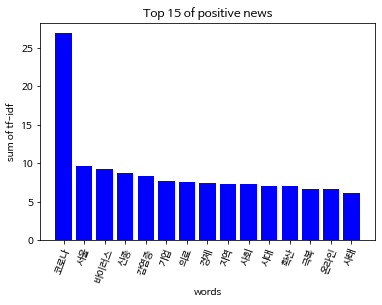

In [59]:
max = 15
plt.bar(range(max), [i[1] for i in POS_words[:max]], color = "blue")
plt.title("Top 15 of positive news")
plt.xlabel("words")
plt.ylabel("sum of tf-idf")
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation = 70)
plt.show()

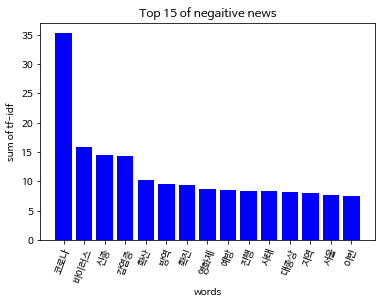

In [60]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color = "blue")
plt.title("Top 15 of negaitive news")
plt.xlabel("words")
plt.ylabel("sum of tf-idf")
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation = 70)
plt.show()